# Data Validation

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from astropy import units as u

In [2]:
from everything import full_analysis

Match function imported.
running
Ready to go!


In [3]:
from radial import radial_read
from dens import density_model

In [4]:
from everything import plot_2d

Input blank dataset

abel test

In [5]:
F = np.arange(100,0,-1)
s = np.arange(0,100,1)

In [6]:
F.shape

(100,)

In [7]:
s.shape

(100,)

In [8]:
from abel import do_abel

In [9]:
f = do_abel(F,s,0)

In [10]:
np.gradient(F,s) #show gradient is a constant at -1

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [11]:
np.linspace(-1,-1,100)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [12]:
def abel_math(s, dfds = np.linspace(-1,-1,100)):
    r_max = np.nanmax(s)
    F_calc = np.zeros(len(s))

    for i in range(len(s)-1):
        r = (s[i]+s[i+1])/2
        r_min = s[i+1]

        b = np.log(np.abs(np.sqrt(( (r_max**2/r**2) - 1)) + (r_max/r)))
        a = np.log(np.abs(np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r)))
        print("i",i)

        print("r_min", r_min)
        print("r_max", r_max)
        print("r",r)
        print("np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r)", np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r))

        # print("dfds: ", dfds[i])
        # print("b-a", b-a)
        print("b", b)
        print("a",a)
        print('\n')

        F_calc[i] = (dfds[i])*(-1/np.pi) * (b-a)

    return F_calc

In [13]:
f2 = abel_math(s)

i 0
r_min 1
r_max 99
r 0.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 3.732050807568877
b 5.981407834293166
a 1.3169578969248166


i 1
r_min 2
r_max 99
r 1.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 2.2152504370215302
b 4.882744525542114
a 0.7953654612239056


i 2
r_min 3
r_max 99
r 2.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.8633249580710798
b 4.371816838175657
a 0.6223625037147785


i 3
r_min 4
r_max 99
r 3.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.6961404780296307
b 4.035191447527406
a 0.5283553629664818


i 4
r_min 5
r_max 99
r 4.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.5954332159489637
b 3.783672704329451
a 0.467145308103262


i 5
r_min 6
r_max 99
r 5.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.5268937748466107
b 3.5827464389221464
a 0.42323545921074807


i 6
r_min 7
r_max 99
r 6.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.4766271094389716
b 3.4153854113119264
a 0.3897605068398119


i 7
r_min 8
r_max 99
r 7.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/

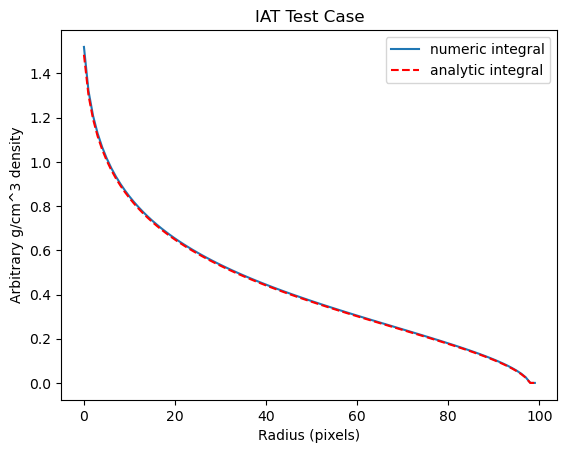

In [14]:
plt.plot(s,f,label='numeric integral')
plt.plot(s,f2, label = 'analytic integral',linestyle = '--', c='r')
plt.xlabel("Radius (pixels)")
plt.ylabel("Arbitrary g/cm^3 density")
plt.title("IAT Test Case")
plt.legend()

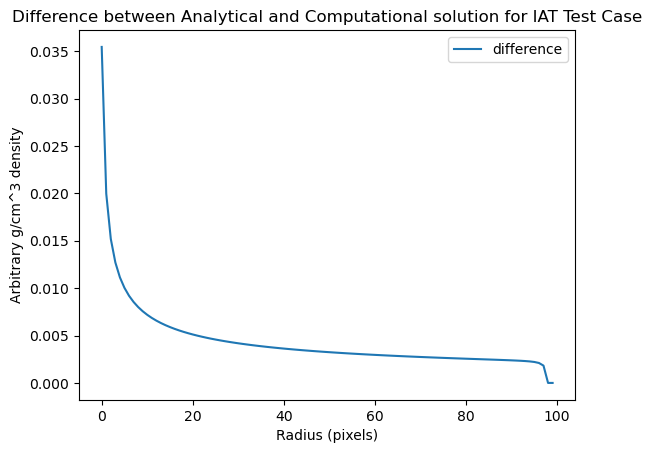

In [15]:
plt.plot(s,f-f2,label='difference')
plt.xlabel("Radius (pixels)")
plt.ylabel("Arbitrary g/cm^3 density")
plt.title("Difference between Analytical and Computational solution for IAT Test Case")
plt.legend()

Text(0.5, 0.98, 'Arbitrary Radial Density Profile')

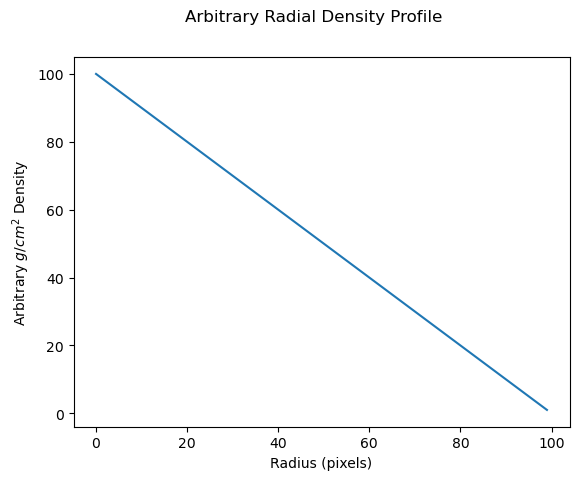

In [16]:
plt.plot(s,F, label = 'Arbitrary Radial Density Profile')
plt.xlabel("Radius (pixels)")
plt.ylabel("Arbitrary $g/cm^2$ Density")
plt.suptitle('Arbitrary Radial Density Profile')
#plt.title('Arbitrary radial density profile with a constantly decreasing density',y=-.25)
#plt.legend()

Different tests for Abel Transform Validation

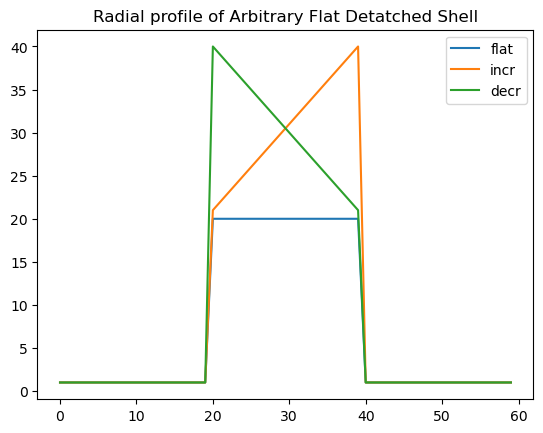

In [17]:
r_detached = np.arange(0,60,1)

F_flat = np.linspace(20,20,60)
F_flat[0:20] = 1
F_flat[40:] = 1

F_incr = np.arange(1,61,1)
F_incr[0:20] = 1
F_incr[40:] = 1

F_decr = np.arange(60,0,-1)
F_decr[0:20] = 1
F_decr[40:] = 1

plt.title("Radial profile of Arbitrary Flat Detatched Shell")
plt.plot(r_detached,F_flat, label = 'flat')
plt.plot(r_detached, F_incr, label = 'incr')
plt.plot(r_detached,F_decr, label = 'decr')
plt.legend()

In [18]:
np.gradient(F_decr,r_detached)

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,  19.5,  19. ,  -1. ,  -1. ,  -1. ,  -1. ,  -1. ,  -1. ,
        -1. ,  -1. ,  -1. ,  -1. ,  -1. ,  -1. ,  -1. ,  -1. ,  -1. ,
        -1. ,  -1. ,  -1. , -10.5, -10. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ])

In [26]:
F_flat_comp = do_abel(F_flat,r_detached,1)
F_flat_analytic = abel_math(r_detached,np.gradient(F_flat,r_detached))

F_incr_comp = do_abel(F_incr, r_detached,1)
F_incr_analytic = abel_math(r_detached, np.gradient(F_incr,r_detached))



i 0
r_min 1
r_max 59
r 0.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 3.732050807568877
b 5.463813849931294
a 1.3169578969248166


i 1
r_min 2
r_max 59
r 1.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 2.2152504370215302
b 4.365057885679016
a 0.7953654612239056


i 2
r_min 3
r_max 59
r 2.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.8633249580710798
b 3.853944724801051
a 0.6223625037147785


i 3
r_min 4
r_max 59
r 3.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.6961404780296307
b 3.517040716760224
a 0.5283553629664818


i 4
r_min 5
r_max 59
r 4.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.5954332159489637
b 3.2651497213414262
a 0.467145308103262


i 5
r_min 6
r_max 59
r 5.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.5268937748466107
b 3.0637569102659263
a 0.42323545921074807


i 6
r_min 7
r_max 59
r 6.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.4766271094389716
b 2.8958342137442323
a 0.3897605068398119


i 7
r_min 8
r_max 59
r 7.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min

In [27]:
F_decr_comp = do_abel(F_decr, r_detached,1)
F_decr_analytic = abel_math(r_detached, np.gradient(F_decr,r_detached))

i 0
r_min 1
r_max 59
r 0.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 3.732050807568877
b 5.463813849931294
a 1.3169578969248166


i 1
r_min 2
r_max 59
r 1.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 2.2152504370215302
b 4.365057885679016
a 0.7953654612239056


i 2
r_min 3
r_max 59
r 2.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.8633249580710798
b 3.853944724801051
a 0.6223625037147785


i 3
r_min 4
r_max 59
r 3.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.6961404780296307
b 3.517040716760224
a 0.5283553629664818


i 4
r_min 5
r_max 59
r 4.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.5954332159489637
b 3.2651497213414262
a 0.467145308103262


i 5
r_min 6
r_max 59
r 5.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.5268937748466107
b 3.0637569102659263
a 0.42323545921074807


i 6
r_min 7
r_max 59
r 6.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min/r) 1.4766271094389716
b 2.8958342137442323
a 0.3897605068398119


i 7
r_min 8
r_max 59
r 7.5
np.sqrt(( (r_min**2/r**2) - 1)) + (r_min

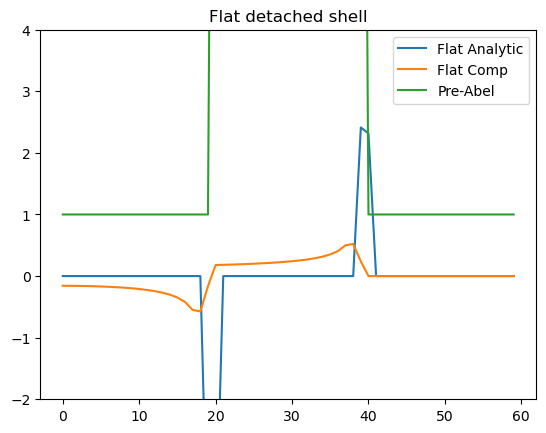

In [28]:
plt.plot(r_detached, F_flat_analytic, label = 'Flat Analytic')
plt.plot(r_detached, F_flat_comp, label = 'Flat Comp')
plt.plot(r_detached, F_flat, label = 'Pre-Abel')
plt.title("Flat detached shell")
plt.ylim(-2,4)
plt.legend()

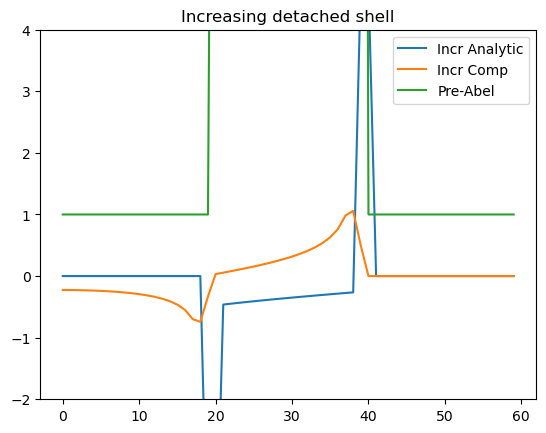

In [29]:
plt.plot(r_detached, F_incr_analytic, label = 'Incr Analytic')
plt.plot(r_detached, F_incr_comp, label = 'Incr Comp')
plt.plot(r_detached, F_incr, label = 'Pre-Abel')
#plt.vline(y=20)
plt.ylim(-2,4)
plt.title("Increasing detached shell")
plt.legend()

In [30]:
F_decr_analytic

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -9.59481604,
       -9.06091801,  0.46231231,  0.44825067,  0.4346554 ,  0.42148202,
        0.40869077,  0.39624581,  0.38411468,  0.3722677 ,  0.36067758,
        0.34931901,  0.33816835,  0.32720333,  0.31640277,  0.30574637,
        0.29521443,  0.28478767,  0.27444696,  0.26417313,  2.66644004,
        2.43747459, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ])

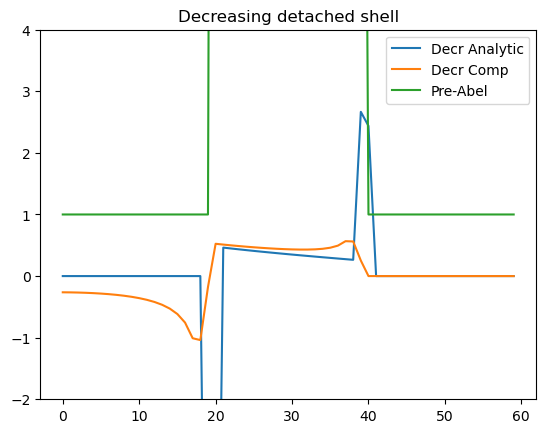

In [31]:
plt.plot(r_detached, F_decr_analytic, label = 'Decr Analytic')
plt.plot(r_detached, F_decr_comp, label = 'Decr Comp')
plt.plot(r_detached, F_decr,label = 'Pre-Abel')
plt.title("Decreasing detached shell")
plt.ylim(-2,4)
plt.legend()

In [32]:
s_exp = np.arange(0,1000,.1)
r_exp = np.zeros(len(s_exp-1))
F_exp = np.pi/s_exp

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/3507336195.py:3: RuntimeWarning: divide by zero encountered in divide
  F_exp = np.pi/s_exp


In [33]:
for i in range(len(s_exp)-1):
        r_exp[i] = (s_exp[i]+s_exp[i+1])/2

In [34]:
s_exp

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.997e+02, 9.998e+02,
       9.999e+02])

In [37]:
f_exp = do_abel(F_exp,s_exp,1)

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/3593198356.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(s_exp, 1/s_exp**2, label = 'Predicted f = 1/s^2 g/cm^3', linestyle = ':')
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/3593198356.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r_exp, 1/r_exp**2, label = 'Predicted f = 1/r^2 g/cm^3', linestyle = ':')


Text(0.5, 0, 'Radius')

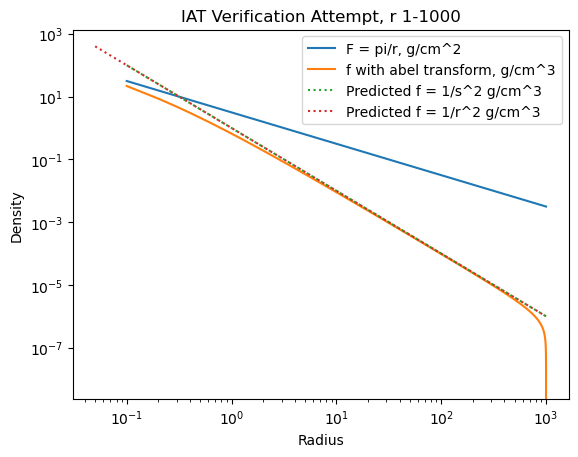

In [38]:
plt.plot(s_exp,F_exp, label = 'F = pi/r, g/cm^2')
plt.plot(s_exp, f_exp, label = 'f with abel transform, g/cm^3')
plt.plot(s_exp, 1/s_exp**2, label = 'Predicted f = 1/s^2 g/cm^3', linestyle = ':')
plt.plot(r_exp, 1/r_exp**2, label = 'Predicted f = 1/r^2 g/cm^3', linestyle = ':')
plt.semilogy()
plt.semilogx()
plt.legend()
plt.title("IAT Verification Attempt, r 1-1000")
plt.ylabel("Density")
plt.xlabel("Radius")
#plt.xlim(0,10)

Try for Radial Profile

In [39]:
blanky = np.ones([100,100])

In [40]:
from radial import radius2d

In [41]:
info = {'position': [49,49]}

In [42]:
r_blanky = radius2d(blanky, info)*u.arcsec

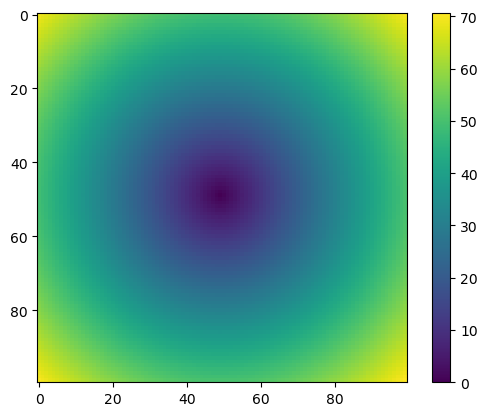

In [43]:
plt.imshow(r_blanky.value)
plt.colorbar()

In [44]:
line_outward = np.arange(50,0,-1)
line_outward

array([50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [45]:
np.min(r_blanky)

<Quantity 0. arcsec>

In [46]:
starry = np.ones([blanky.shape[0], blanky.shape[1]])

for i in range(blanky.shape[0]):
    for j in range(blanky.shape[1]):
        r_i = int(np.round(r_blanky[i,j].value))

        if r_i>20:
            starry[i,j] = 1

        else:
            starry[i,j] = line_outward[r_i]


In [47]:
starry = starry.copy()*u.Jy/u.arcsec**2 # make Jy/arc2 so we can use it
starry

<Quantity [[1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           ...,
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.]] Jy / arcsec2>

Text(0, 0.5, 'Pixels')

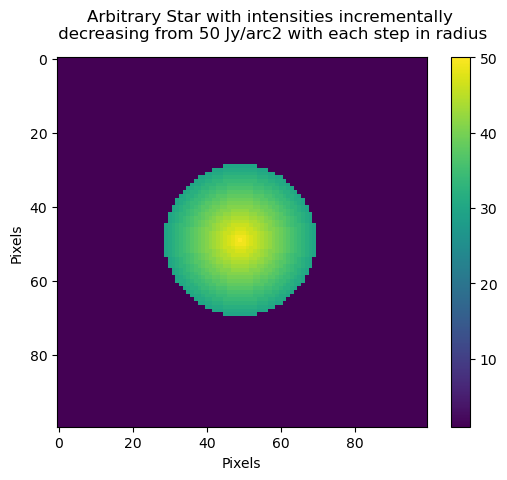

In [48]:
plt.imshow(starry.value)
plt.colorbar()
plt.suptitle("Arbitrary Star with intensities incrementally\n decreasing from 50 Jy/arc2 with each step in radius")
#plt.title("Radius = 20 arc, Background Median = 1 Jy/arc2")

plt.xlabel("Pixels")
plt.ylabel("Pixels")

# x=10
# plt.xlim(49-x,49+x)
# plt.ylim(49-x,49+x)

# radial profile of star with intensities incrementally decreasing from 50 with each pixel
# background is 1

In [49]:
info['pix_size_arcsec'] = 1
info['std'] = 1

In [50]:
from radial import sm

In [51]:
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus

In [52]:
from astropy.stats import sigma_clipped_stats


In [53]:
temp = starry.copy()
temp[np.isnan(temp)]=(10*np.std(temp))
mask = np.abs(temp-np.median(temp))>(3*np.std(temp))
info['mean'], info['median'], info['std'] = sigma_clipped_stats(starry, sigma = 3,mask=mask)
print("Mean: ", info['mean'])
print("Median: ",info['median'])
print("Std: ", info['std'])

Mean:  1.0 Jy / arcsec2
Median:  1.0 Jy / arcsec2
Std:  0.0 Jy / arcsec2


In [54]:
starry.shape[0]-info['position'][0]-1

50

In [55]:
def annulus_stdev(data, radius):
    #cycle through data and radii using title[c]
    stdev = []

    for i in range(198):

        ann = []
        

        r_in = i
        r_out = i+1

        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if radius[i,j]>r_in and radius[i,j]<r_out:
                    ann.append(data[i,j])

        stdev.append(np.std(ann))

    return stdev

In [56]:
std = annulus_stdev(starry.value,r_blanky.value)

/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [57]:
std

[nan,
 0.0,
 0.4714045207910316,
 0.5,
 0.0,
 0.4948716593053935,
 0.4330127018922193,
 0.4810456929208347,
 0.4985185152621431,
 0.42132504423474304,
 0.4948716593053935,
 0.44221663871405326,
 0.48237638894272,
 0.4898979485566356,
 0.4856209060564557,
 0.49943278484292924,
 0.46013066279384185,
 0.46153846153846156,
 0.4753120259341455,
 0.48521542343000995,
 14.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [58]:
def rp_annulus(data,info):
    '''
    data, pix size in arcsec, position of center star
    '''

    pix_size_arcsec = info['pix_size_arcsec']
    position = info['position']

    cent = (position[1],position[0])

    #### aperture_size = r_betelgeuse.value / pix_size_arcsec.value #put in pixel units
    ### aperture = CircularAperture(cent,aperture_size)
    ### photometry = aperture_photometry(data,aperture)
    # print()
    # print("Photometry: ", photometry)

    aperture_sizes = np.arange(1,200,1)
    # print("aperture_sizes =", aperture_sizes)
    # print("info_std",info["std"])
    error = np.full((data.shape[0],data.shape[1]),info['median'])*u.Jy/u.arcsec**2
    # print("error =", error)
    annuli=[CircularAnnulus(cent, r_in=aperture_sizes[i], r_out=aperture_sizes[i+1]) for i in range(len(aperture_sizes)-1)]
    # print("annuli =", annuli)
    areas = np.array([circle.area for circle in annuli])#*pix_size_arcsec**2
    # print("areas =", areas)
    # print(apertures)
    
    
    photometry = aperture_photometry(data, annuli,error=error)
    #print(photometry.items())
    phot_list = []
    phot_list_err = []
    
    for k,v in photometry.items():
        # print("k",k)
        # print("v",v)
        if 'aperture_sum' in k and 'err' not in k:
            # print("A ",v)
            phot_list.append(v)
        elif 'aperture_sum_err' in k:
            # print("B",v.value)
            phot_list_err.append(v.value)

    phot_array = np.array(phot_list)
    # print("phot_array",phot_array)
    # print("err",phot_list_err)
    phot_array_err = np.array(phot_list_err)
    #print(phot_list)
    surf_brightness_jy_arc2 = (phot_array.flatten()*u.Jy/u.arcsec**2)/(areas)
    err = phot_array_err.flatten()*u.Jy/u.arcsec**2#/areas
    # surf_brightness_jy_arc2 =( phot_array.flatten()/ (areas)) *u.Jy/u.arcsec**2 #
    # info['error'] = (phot_array_err.flatten()/areas)*u.Jy/u.arcsec**2 #
    #print(err)


    centers_arc = ((aperture_sizes[1:]+aperture_sizes[:-1])/2)*pix_size_arcsec
    centers_pc = sm(168,centers_arc)*u.pc

    centers = {'pc': centers_pc, 'arc': centers_arc}

    info['areas_arc2'] = areas*pix_size_arcsec**2
    info['areas_pix'] = areas
    info['radial_err'] = np.std(surf_brightness_jy_arc2)
    info['annuli'] = annuli
    info['r_edges'] = aperture_sizes

    return centers,surf_brightness_jy_arc2,err

In [59]:
centers, rp_1d,err = rp_annulus(starry, info)

Text(0, 0.5, 'Arbitrary Stdev (Jy/arc2)')

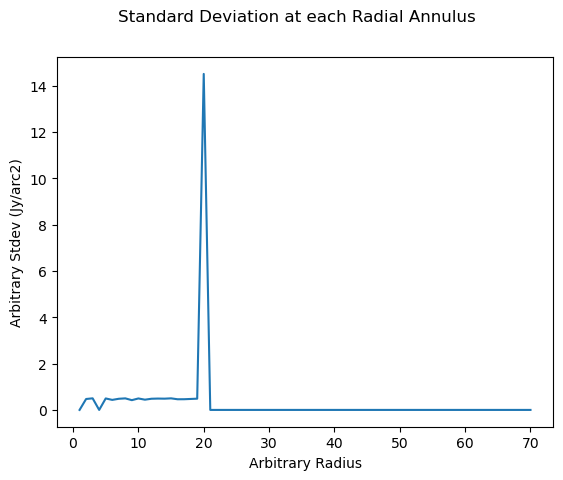

In [60]:
plt.plot(std)
#plt.title("Stdev plot peaks at radius of star because this test star drops off suddenly at r=20. \n This spike is expected because of the sharp drop off, and does not indicate a problem",y=-.25)
#plt.title("This spike is expected because of the sharp drop off, and does not indicate a problem", y=-.35)
plt.suptitle("Standard Deviation at each Radial Annulus")
plt.xlabel("Arbitrary Radius")
plt.ylabel("Arbitrary Stdev (Jy/arc2)")

(-1.0, 1.0)

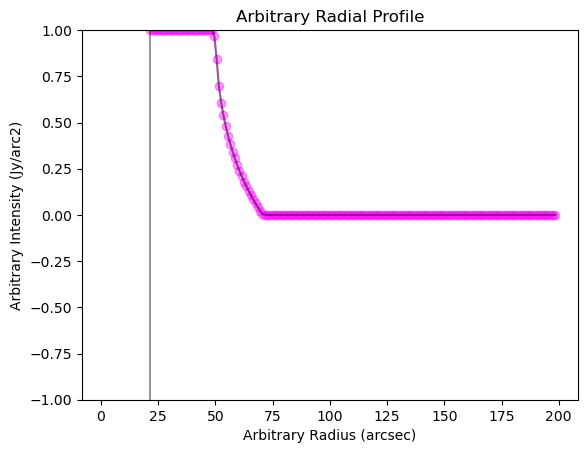

In [61]:
plt.plot(centers['arc'],rp_1d.value,'o-',alpha=0.4,c='fuchsia')
plt.errorbar(centers['arc'],rp_1d.value,yerr=std,alpha=0.4, c= 'black')

plt.title("Arbitrary Radial Profile")
#plt.suptitle("Star with a radius of 20, intensities decreasing by 1 with each pixel width annulus", y=0)
plt.xlabel("Arbitrary Radius (arcsec)")
plt.ylabel("Arbitrary Intensity (Jy/arc2)")
plt.ylim(-1,1)
#plt.errorbar(centers['arc'],rp_1d,yerr=err,c='b')

In [63]:
f_new = do_abel(rp_1d.value, centers['arc'],1)

Test rays

In [66]:
np.where(starry==np.nanmax(starry))
cx=49
cy=49

In [67]:
from scipy.ndimage import map_coordinates


In [ ]:
n_lines = 100
n_pts = 200

psis = np.linspace(0,2*np.pi, n_lines)
rs = np.linspace(0,200,200)

In [ ]:
def lines(data, cx,cy, n_lines = 100, n_pts = 200,psis = np.linspace(0,2*np.pi, n_lines),
          rs = np.linspace(0,200,200)):
    '''
    returns n_lines rays of n_pts long radial profiles

    '''

    rys = np.zeros((n_lines, n_pts))

    for i, psi in enumerate(psis):
        x = cx + rs * np.cos(psi)
        y = cy + rs * np.sin(psi)


        coords = np.vstack((y,x))


        a = map_coordinates(data, coords, order = 1, mode='constant')

        rys[i] = a

    return rys

In [397]:
from matplotlib.pyplot import cm

In [398]:
def plot_1d_rays(rays,radius,psis, minpsi,maxpsi,suptitle = "Angular Radial Intensities",
                 xmin = -5, xmax = 105, ymin = -5, ymax= 55):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''

    #ax1_ymin=1e-6, ax1_ymax=1e1,xmin=0,xmax=0.31,

    plt.rcParams["font.family"] = "times"
    fig, (ax1) = plt.subplots(1, 1, figsize = [8,4])
    fig.suptitle(suptitle)

    color=iter(cm.viridis(np.linspace(0,1,rays.shape[0])))

    col = []


    for i in range(rays.shape[0]):
        c = next(color)
        col.append(c)
        ax1.plot(radius,rays[i],'o-',alpha=0.4,label = f"{np.round(psis[i]/np.pi,2)} $\pi$",c=c)


    ax1.set_xlim(xmin,xmax)
    ax1.set_ylim(ymin, ymax)
    #ax1.semilogy()
    #line_collection = LineCollection(rays, color = col)
    cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
                 ticks = [minpsi, maxpsi])
    cbar.set_ticklabels([f"{np.round(np.min(psis)/np.pi,1)} $\pi$", f"{np.round(np.max(psis)/np.pi,1)} $\pi$"])

    ax1.set_xlabel('Radius (arc)')
    ax1.set_ylabel(r'Intensity (Jy arc$^{-2}$)')

    fig.show()

0,24 25,50 51,76 77:

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


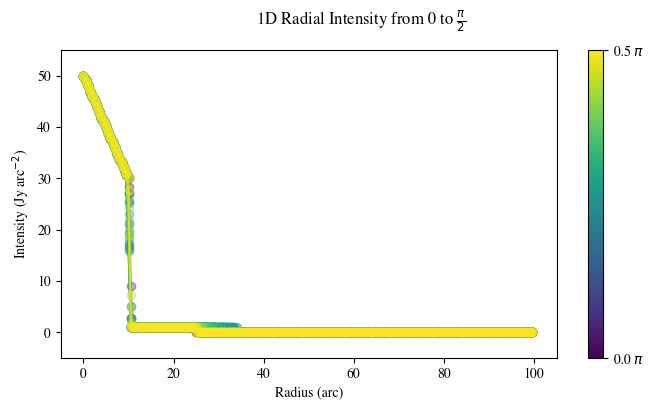

In [399]:
plot_1d_rays(lines(starry,cx,cy)[0:25], np.arange(0,100,.5),psis = psis[0:25], minpsi = 0, maxpsi = np.pi/2, suptitle = r"1D Radial Intensity from 0 to $\frac{\pi}{2}$")

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


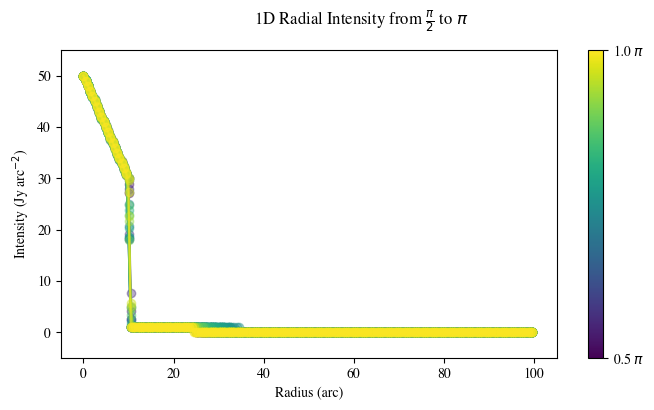

In [400]:
plot_1d_rays(lines(starry,cx,cy)[25:50], np.arange(0,100,.5),psis = psis[25:50], minpsi = np.pi/2, maxpsi = np.pi, suptitle = r"1D Radial Intensity from $\frac{\pi}{2}$ to $\pi$")

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


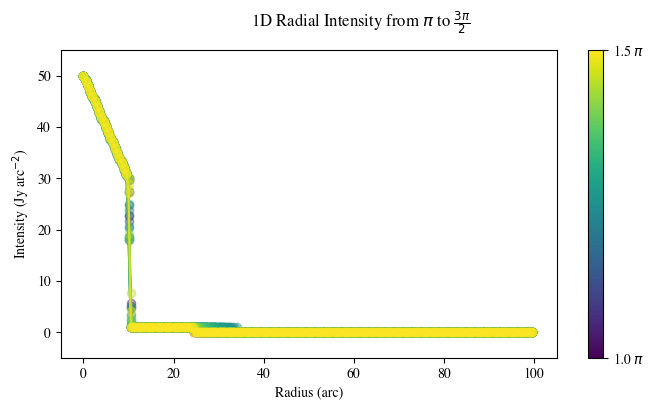

In [401]:
plot_1d_rays(lines(starry,cx,cy)[50:75], np.arange(0,100,.5),psis = psis[50:75], minpsi = np.pi, maxpsi = 3*np.pi/2, suptitle = r"1D Radial Intensity from $\pi$ to $\frac{3\pi}{2}$")

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_2065/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


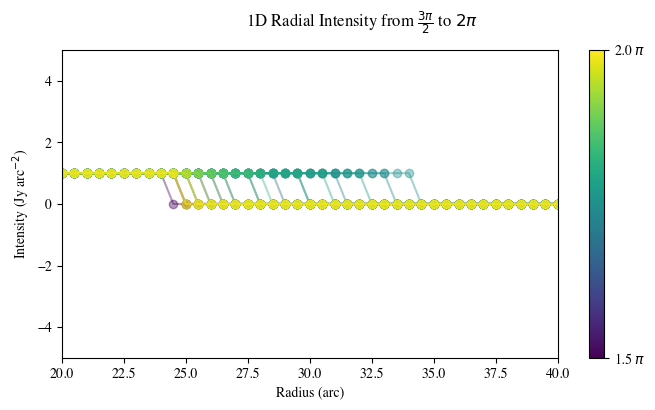

In [402]:
plot_1d_rays(lines(starry,cx,cy)[75:100], np.arange(0,100,.5),psis = psis[75:100], minpsi = 3*np.pi/2, maxpsi = 2*np.pi, suptitle = r"1D Radial Intensity from $\frac{3\pi}{2}$ to $2\pi$",
             xmin = 20, xmax = 40, ymin = -5, ymax = 5)

In [413]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


In [414]:
a = lines(starry,cx,cy)

In [420]:
a[0:25].shape

(25, 200)